In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
# Replace '/path/to/saved/model.h5' with the path where your HDF5 model is saved
model = tf.keras.models.load_model('inception_food101.h5')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
classes= ['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster_roll_sandwich',
 'macaroni_and_cheese',
 'macarons',
 'miso_soup',
 'mussels',
 'nachos',
 'omelette',
 'onion_rings',
 'oysters',
 'pad_thai',
 'paella',
 'pancakes',
 'panna_cotta',
 'peking_duck',
 'pho',
 'pizza',
 'pork_chop',
 'poutine',
 'prime_rib',
 'pulled_pork_sandwich',
 'ramen',
 'ravioli',
 'red_velvet_cake',
 'risotto',
 'samosa',
 'sashimi',
 'scallops',
 'seaweed_salad',
 'shrimp_and_grits',
 'spaghetti_bolognese',
 'spaghetti_carbonara',
 'spring_rolls',
 'steak',
 'strawberry_shortcake',
 'sushi',
 'tacos',
 'takoyaki',
 'tiramisu',
 'tuna_tartare',
 'waffles']


In [3]:
def get_nutrient_info_csv(file_path, dish_name):
    # Load the CSV file
    df = pd.read_csv(file_path)

    # Filter the row for the specified dish
    dish_row = df[df['dish'] == dish_name]

   
    protein = dish_row.iloc[0]['protein_per_100g']
    fats = dish_row.iloc[0]['fats_per_100g']
    carbs = dish_row.iloc[0]['carbs_per_100g']
    return (f"Nutrient Information for {dish_name.replace('_', ' ')}:\n"
                f"Protein per 100g: {protein}\n"
                f"Fats per 100g: {fats}\n"
                f"Carbs per 100g: {carbs}")
    

In [4]:
len(classes)

101

In [5]:
def getPred(image_path,classes,model):
    img = image.load_img(image_path, target_size=(224, 224))
    plt.imshow(img)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize pixel values
    
    ans=np.argmax(model.predict(img_array), axis=1)[0]
    
    
    food=classes[ans]
    print(food)
    print(get_nutrient_info_csv('./food-nutrients.csv',food))

In [46]:
df.tail(1)

dish protein_per_100g fats_per_100g carbs_per_100g
100  waffles               6g           15g            60g

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Nutrient Information for Donuts:
Protein per 100g: 3g
Fats per 100g: 17g
Carbs per 100g: 70g


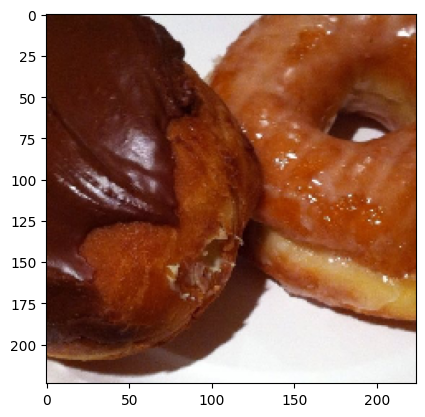

In [52]:
getPred('./images/donuts/1006079.jpg',classes,model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Nutrient Information for French Fries:
Protein per 100g: 3g
Fats per 100g: 15g
Carbs per 100g: 60g


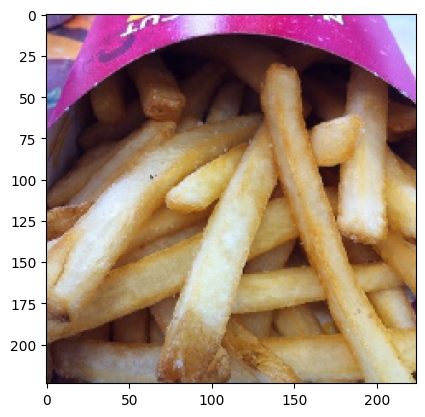

In [53]:
getPred('./images/french_fries/1008163.jpg',classes,model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Nutrient Information for Pizza:
Protein per 100g: 12g
Fats per 100g: 15g
Carbs per 100g: 60g


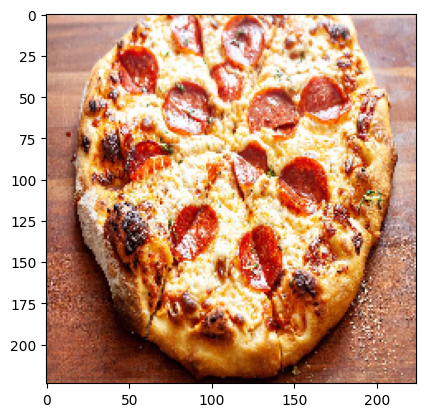

In [6]:
getPred('manual_test1.jpg',classes,model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Nutrient Information for Hamburger:
Protein per 100g: 20g
Fats per 100g: 25g
Carbs per 100g: 30g


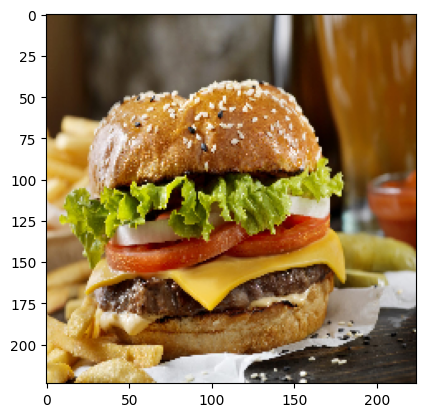

In [7]:
getPred('manual_test2.jpg',classes,model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
Nutrient Information for Samosa:
Protein per 100g: 6g
Fats per 100g: 15g
Carbs per 100g: 30g


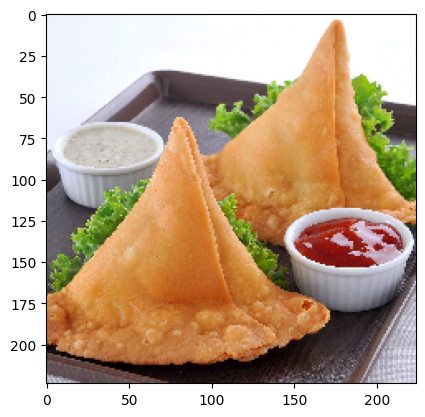

In [8]:
getPred('manual_test3.jpg',classes,model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Nutrient Information for Bruschetta:
Protein per 100g: 6g
Fats per 100g: 7g
Carbs per 100g: 40g


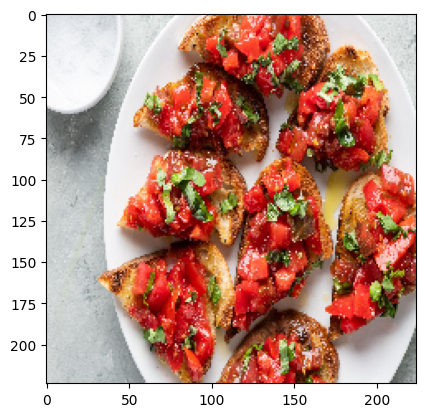

In [9]:
getPred('manual_test34.jpg',classes,model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Nutrient Information for Chicken Wings:
Protein per 100g: 20g
Fats per 100g: 25g
Carbs per 100g: 0g


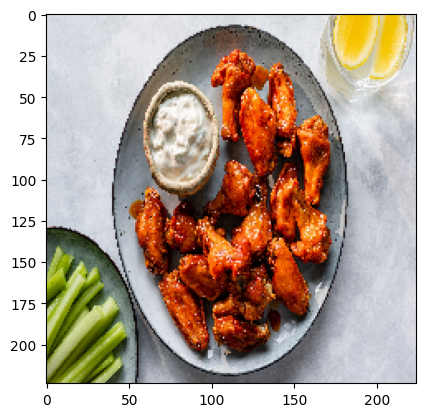

In [10]:
getPred('chickenwings.jpg',classes,model)

# dataset link of training :https://www.kaggle.com/datasets/dansbecker/food-101

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Nutrient Information for French Fries:
Protein per 100g: 3g
Fats per 100g: 15g
Carbs per 100g: 60g


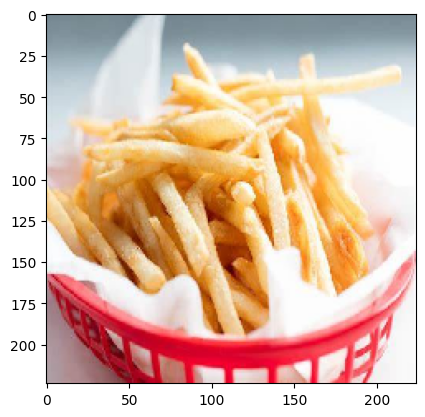

In [11]:
getPred('manual_test5.jpg',classes,model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Nutrient Information for Paella:
Protein per 100g: 12g
Fats per 100g: 20g
Carbs per 100g: 60g


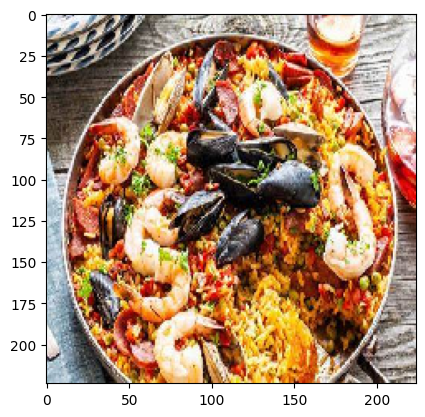

In [12]:
getPred('paella.jfif',classes,model)

In [17]:

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import InceptionV3
from keras.layers import Input

# Parameters
batch_size = 100
num_classes = 101
epochs = 10
base_model = InceptionV3(weights='imagenet', include_top=False,input_tensor=Input(shape=(224, 224, 3)))


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Combine base model and custom layers
modelx = Model(inputs=base_model.input, outputs=predictions)


for layer in base_model.layers:
    layer.trainable = False

# Compile the model
modelx.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 15s 0us/step


In [19]:
modelx.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 111, 111, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization           │ (None, 111, 111, 32)      │              96 │ conv2d[0][0]               │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation (Activation)       │ (None, 111, 111, 32)      │               0 │ batch_normalization[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 109, 109, 32)      │           9,216 │ activation[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_1         │ (None, 109, 109, 32)      │              96 │ conv2d_1[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_1 (Activation)     │ (None, 109, 109, 32)      │               0 │ batch_normalization_1[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 109, 109, 64)      │          18,432 │ activation_1[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_2         │ (None, 109, 109, 64)      │             192 │ conv2d_2[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_2 (Activation)     │ (None, 109, 109, 64)      │               0 │ batch_normalization_2[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 54, 54, 64)        │               0 │ activation_2[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 54, 54, 80)        │           5,120 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_3         │ (None, 54, 54, 80)        │             240 │ conv2d_3[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_3 (Activation)     │ (None, 54, 54, 80)        │               0 │ batch_normalization_3[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 52, 52, 192)       │         138,240 │ activation_3[0][0]         │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 24,004,485 (91.57 MB)

 Trainable params: 2,201,701 (8.40 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Nutrient Information for Donuts:
Protein per 100g: 3g
Fats per 100g: 17g
Carbs per 100g: 70g


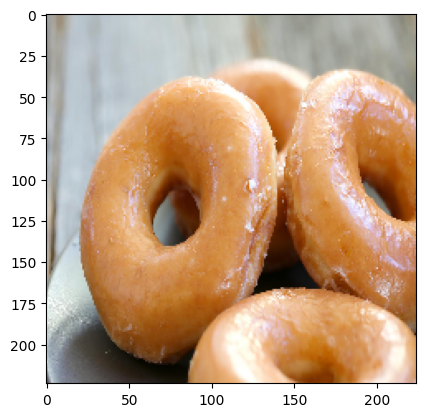

In [20]:
getPred('donuts.jfif',classes,model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Nutrient Information for Club Sandwich:
Protein per 100g: 20g
Fats per 100g: 15g
Carbs per 100g: 50g


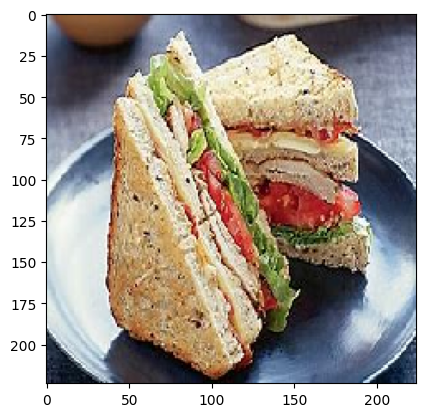

In [21]:
getPred('clubsandwich.jfif',classes,model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
Nutrient Information for Fish And Chips:
Protein per 100g: 15g
Fats per 100g: 20g
Carbs per 100g: 60g


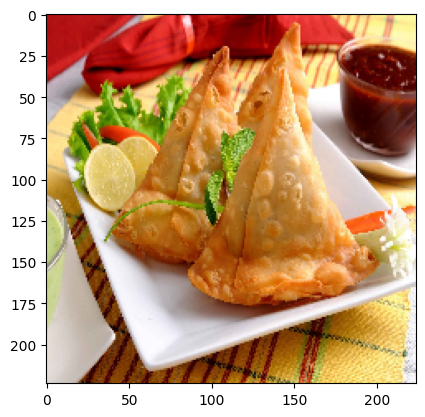

In [22]:
getPred('./food.jfif',classes,model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Nutrient Information for Samosa:
Protein per 100g: 6g
Fats per 100g: 15g
Carbs per 100g: 30g


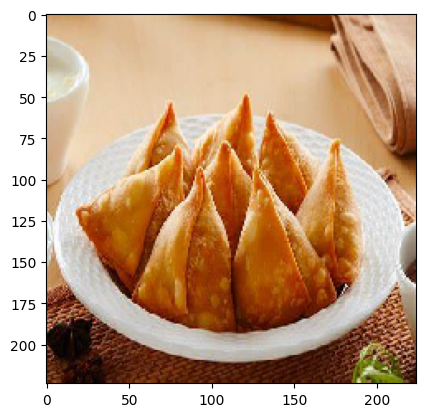

In [23]:
getPred('food2.jfif',classes,model)